In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

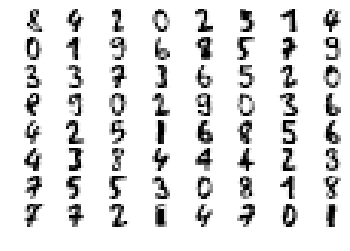

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

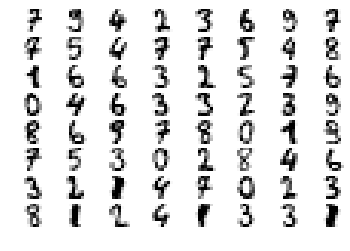

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.09921 stdev: 0.04135
Best fitness: 0.21769 - size: (10, 64) - species 5 - id 21
Average adjusted fitness: 0.089
Mean genetic distance 2.807, standard deviation 0.290
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 16.951 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11905 stdev: 0.03663
Best fitness: 0.21769 - size: (10, 64) - species 5 - id 21
Average adjusted fitness: 0.085
Mean genetic distance 2.871, standard deviation 0.330
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 17.137 sec (17.044 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.12614 stdev: 0.04230
Best fitness: 0.25417 - size: (11, 63) - species 8 - id 473
Average adjusted fitness: 0.116
Mean genetic distance 2.898, standard deviation 0.349
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 16.648 sec (16.

Population's average fitness: 0.16806 stdev: 0.05681
Best fitness: 0.29870 - size: (16, 74) - species 3 - id 1974
Average adjusted fitness: 0.137
Mean genetic distance 3.205, standard deviation 0.411
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.337 sec (21.970 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.17486 stdev: 0.05010
Best fitness: 0.29870 - size: (16, 74) - species 3 - id 1974
Average adjusted fitness: 0.105
Mean genetic distance 3.208, standard deviation 0.422
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.072 sec (21.989 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.16824 stdev: 0.05454
Best fitness: 0.29870 - size: (16, 74) - species 3 - id 1974
Average adjusted fitness: 0.120
Mean genetic distance 3.210, standard deviation 0.434
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 20.845 sec (21.586 average)

 

Population's average fitness: 0.17536 stdev: 0.06739
Best fitness: 0.33828 - size: (15, 69) - species 7 - id 5181
Average adjusted fitness: 0.147
Mean genetic distance 3.227, standard deviation 0.517
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 20.859 sec (23.334 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.18494 stdev: 0.06273
Best fitness: 0.33828 - size: (15, 69) - species 7 - id 5181
Average adjusted fitness: 0.137
Mean genetic distance 3.213, standard deviation 0.518
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 21.335 sec (22.864 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.18613 stdev: 0.06053
Best fitness: 0.34447 - size: (13, 65) - species 33 - id 7091
Average adjusted fitness: 0.136
Mean genetic distance 3.212, standard deviation 0.536
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 22.048 sec (22.765 average)



Population's average fitness: 0.17209 stdev: 0.06108
Best fitness: 0.34447 - size: (13, 65) - species 33 - id 7091
Average adjusted fitness: 0.131
Mean genetic distance 3.078, standard deviation 0.555
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 22.692 sec (22.109 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.16779 stdev: 0.06045
Best fitness: 0.34447 - size: (13, 65) - species 33 - id 7091
Average adjusted fitness: 0.114
Mean genetic distance 3.045, standard deviation 0.560
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 22.660 sec (22.208 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.17521 stdev: 0.05657
Best fitness: 0.34447 - size: (13, 65) - species 33 - id 7091
Average adjusted fitness: 0.119
Mean genetic distance 3.039, standard deviation 0.558
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 22.853 sec (22.315 average)

Population's average fitness: 0.17931 stdev: 0.06656
Best fitness: 0.35807 - size: (22, 76) - species 46 - id 15219
Average adjusted fitness: 0.147
Mean genetic distance 3.138, standard deviation 0.561
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 23.140 sec (24.297 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.17728 stdev: 0.06630
Best fitness: 0.35807 - size: (22, 76) - species 46 - id 15219
Average adjusted fitness: 0.144
Mean genetic distance 3.091, standard deviation 0.584
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 22.815 sec (23.662 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.16953 stdev: 0.06356
Best fitness: 0.35807 - size: (22, 76) - species 46 - id 15219
Average adjusted fitness: 0.125
Mean genetic distance 3.098, standard deviation 0.567
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 23.227 sec (23.280 avera

Population's average fitness: 0.18622 stdev: 0.06469
Best fitness: 0.35807 - size: (22, 76) - species 46 - id 15219
Average adjusted fitness: 0.119
Mean genetic distance 3.159, standard deviation 0.577
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 24.529 sec (25.364 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.18437 stdev: 0.06639
Best fitness: 0.35807 - size: (22, 76) - species 46 - id 15219
Average adjusted fitness: 0.135
Mean genetic distance 3.129, standard deviation 0.563
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 23.578 sec (25.318 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.18225 stdev: 0.06774
Best fitness: 0.35807 - size: (22, 76) - species 46 - id 15219
Average adjusted fitness: 0.128
Mean genetic distance 3.146, standard deviation 0.562
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 23.298 sec (25.206 ave

Population's average fitness: 0.17311 stdev: 0.06669
Best fitness: 0.38343 - size: (16, 67) - species 33 - id 22784
Average adjusted fitness: 0.134
Mean genetic distance 3.105, standard deviation 0.572
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 24.876 sec (28.463 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.17158 stdev: 0.06372
Best fitness: 0.38343 - size: (16, 67) - species 33 - id 22784
Average adjusted fitness: 0.122
Mean genetic distance 3.077, standard deviation 0.581
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 25.206 sec (27.933 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.17083 stdev: 0.07039
Best fitness: 0.38343 - size: (16, 67) - species 33 - id 22784
Average adjusted fitness: 0.136
Mean genetic distance 3.046, standard deviation 0.626
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 23.977 sec (27.292 ave

Population's average fitness: 0.18497 stdev: 0.06762
Best fitness: 0.38343 - size: (16, 67) - species 33 - id 22784
Average adjusted fitness: 0.159
Mean genetic distance 2.900, standard deviation 0.479
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 24.854 sec (25.238 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.18240 stdev: 0.06559
Best fitness: 0.38343 - size: (16, 67) - species 33 - id 22784
Average adjusted fitness: 0.132
Mean genetic distance 2.897, standard deviation 0.481
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 25.198 sec (25.042 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.18050 stdev: 0.06816
Best fitness: 0.38343 - size: (16, 67) - species 33 - id 22784
Average adjusted fitness: 0.147
Mean genetic distance 2.896, standard deviation 0.490
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 24.978 sec (24.956 ave

Population's average fitness: 0.19304 stdev: 0.07236
Best fitness: 0.38343 - size: (16, 67) - species 33 - id 22784
Average adjusted fitness: 0.133
Mean genetic distance 2.893, standard deviation 0.482
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 24.773 sec (24.920 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.20004 stdev: 0.07039
Best fitness: 0.38343 - size: (16, 67) - species 33 - id 22784
Average adjusted fitness: 0.160
Mean genetic distance 2.918, standard deviation 0.490
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 25.115 sec (24.966 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.19000 stdev: 0.07166
Best fitness: 0.38343 - size: (16, 67) - species 33 - id 22784
Average adjusted fitness: 0.162
Mean genetic distance 2.919, standard deviation 0.499
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 24.584 sec (24.800 ave

Population's average fitness: 0.20216 stdev: 0.07355
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.144
Mean genetic distance 2.902, standard deviation 0.546
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 21.811 sec (21.875 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.20292 stdev: 0.07323
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.192
Mean genetic distance 2.906, standard deviation 0.531
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 22.341 sec (22.193 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.18791 stdev: 0.07304
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.143
Mean genetic distance 2.925, standard deviation 0.525
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 22.136 sec (22.518 ave

Population's average fitness: 0.19589 stdev: 0.07144
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.160
Mean genetic distance 2.891, standard deviation 0.503
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 23.731 sec (22.818 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.19248 stdev: 0.07965
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.164
Mean genetic distance 2.873, standard deviation 0.526
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 23.041 sec (22.895 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.19127 stdev: 0.07278
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.173
Mean genetic distance 2.885, standard deviation 0.515
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 24.039 sec (23.071 ave

Population's average fitness: 0.20625 stdev: 0.07500
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.150
Mean genetic distance 2.868, standard deviation 0.547
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 23.496 sec (23.353 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.20120 stdev: 0.07405
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.154
Mean genetic distance 2.861, standard deviation 0.521
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 23.652 sec (23.405 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.19997 stdev: 0.07406
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.170
Mean genetic distance 2.816, standard deviation 0.522
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 23.517 sec (23.433 aver

Population's average fitness: 0.19294 stdev: 0.06887
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.155
Mean genetic distance 2.896, standard deviation 0.549
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 22.073 sec (22.423 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.18978 stdev: 0.06917
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.118
Mean genetic distance 2.932, standard deviation 0.576
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 21.770 sec (22.409 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.17804 stdev: 0.07171
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.133
Mean genetic distance 2.953, standard deviation 0.546
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 21.345 sec (22.298 averag

Population's average fitness: 0.20057 stdev: 0.07329
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.148
Mean genetic distance 2.931, standard deviation 0.540
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 24.209 sec (23.516 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.20460 stdev: 0.06955
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.129
Mean genetic distance 2.921, standard deviation 0.541
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 23.439 sec (23.538 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.19867 stdev: 0.07276
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.174
Mean genetic distance 2.912, standard deviation 0.567
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 23.335 sec (23.474 ave

Population's average fitness: 0.18911 stdev: 0.06666
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.141
Mean genetic distance 2.832, standard deviation 0.437
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 22.146 sec (22.457 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.18619 stdev: 0.07110
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.142
Mean genetic distance 2.803, standard deviation 0.446
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 22.369 sec (22.380 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.18478 stdev: 0.07331
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.150
Mean genetic distance 2.809, standard deviation 0.453
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 22.477 sec (22.314 ave

Population's average fitness: 0.19949 stdev: 0.07255
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.171
Mean genetic distance 2.806, standard deviation 0.505
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 23.220 sec (23.177 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.19208 stdev: 0.07495
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.149
Mean genetic distance 2.799, standard deviation 0.511
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 22.681 sec (23.141 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.20156 stdev: 0.07664
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.152
Mean genetic distance 2.800, standard deviation 0.524
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 22.272 sec (22.898 averag

Population's average fitness: 0.18525 stdev: 0.07149
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.131
Mean genetic distance 2.940, standard deviation 0.642
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 21.737 sec (22.500 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.19373 stdev: 0.07324
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.145
Mean genetic distance 2.946, standard deviation 0.643
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 22.330 sec (22.453 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.19474 stdev: 0.07433
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.158
Mean genetic distance 2.970, standard deviation 0.605
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 22.538 sec (22.451 ave

Population's average fitness: 0.19682 stdev: 0.07887
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.139
Mean genetic distance 3.079, standard deviation 0.620
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 23.102 sec (23.342 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.20674 stdev: 0.07861
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.194
Mean genetic distance 3.056, standard deviation 0.622
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 23.323 sec (23.316 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.21003 stdev: 0.07426
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.172
Mean genetic distance 3.073, standard deviation 0.607
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 22.870 sec (23.279 ave

Population's average fitness: 0.18980 stdev: 0.07315
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.134
Mean genetic distance 2.895, standard deviation 0.628
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 22.163 sec (22.852 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.19777 stdev: 0.07470
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.174
Mean genetic distance 2.901, standard deviation 0.622
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 22.589 sec (22.789 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.19198 stdev: 0.07468
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.150
Mean genetic distance 2.912, standard deviation 0.651
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 22.223 sec (22.740 averag

Population's average fitness: 0.20142 stdev: 0.07967
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.164
Mean genetic distance 2.994, standard deviation 0.509
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 23.146 sec (23.127 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.20059 stdev: 0.07316
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.143
Mean genetic distance 2.982, standard deviation 0.505
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 22.521 sec (23.010 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.20339 stdev: 0.07286
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.157
Mean genetic distance 2.963, standard deviation 0.517
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 23.962 sec (23.091 ave

Population's average fitness: 0.20380 stdev: 0.07730
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.178
Mean genetic distance 2.930, standard deviation 0.563
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 23.409 sec (23.793 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.20665 stdev: 0.06955
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.143
Mean genetic distance 2.937, standard deviation 0.538
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 24.470 sec (23.804 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.20753 stdev: 0.07409
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.139
Mean genetic distance 2.931, standard deviation 0.541
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 23.727 sec (23.764 averag

Population's average fitness: 0.21398 stdev: 0.07925
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.160
Mean genetic distance 3.009, standard deviation 0.606
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 23.522 sec (23.792 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.21145 stdev: 0.07626
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.204
Mean genetic distance 3.022, standard deviation 0.594
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 23.733 sec (23.823 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.21122 stdev: 0.07737
Best fitness: 0.41373 - size: (28, 85) - species 84 - id 36629
Average adjusted fitness: 0.152
Mean genetic distance 3.010, standard deviation 0.604
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 23.310 sec (23.781 ave

Population's average fitness: 0.20299 stdev: 0.08236
Best fitness: 0.42981 - size: (40, 99) - species 164 - id 93070
Average adjusted fitness: 0.179
Mean genetic distance 2.942, standard deviation 0.563
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 25.079 sec (24.703 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.20808 stdev: 0.08699
Best fitness: 0.42981 - size: (40, 99) - species 164 - id 93070
Average adjusted fitness: 0.180
Mean genetic distance 2.919, standard deviation 0.571
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 24.823 sec (24.741 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.21362 stdev: 0.08252
Best fitness: 0.42981 - size: (40, 99) - species 164 - id 93070
Average adjusted fitness: 0.162
Mean genetic distance 2.933, standard deviation 0.541
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 24.661 sec (24.743 

Mean genetic distance 2.960, standard deviation 0.594
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 25.975 sec (26.591 average)

 ****** Running generation 552 ****** 

Population's average fitness: 0.21019 stdev: 0.08536
Best fitness: 0.45269 - size: (40, 98) - species 164 - id 96140
Average adjusted fitness: 0.204
Mean genetic distance 2.963, standard deviation 0.563
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 26.243 sec (26.578 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.20864 stdev: 0.08894
Best fitness: 0.45269 - size: (40, 98) - species 164 - id 96140
Average adjusted fitness: 0.197
Mean genetic distance 2.943, standard deviation 0.554
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 26.489 sec (26.594 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.21237 stdev: 0.07972
Best fitness: 0.45269 - size: (40, 98) - speci

Population's average fitness: 0.21393 stdev: 0.08577
Best fitness: 0.45269 - size: (40, 98) - species 164 - id 96140
Average adjusted fitness: 0.159
Mean genetic distance 2.807, standard deviation 0.496
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 25.053 sec (25.643 average)

 ****** Running generation 576 ****** 

Population's average fitness: 0.20532 stdev: 0.08760
Best fitness: 0.45269 - size: (40, 98) - species 164 - id 96140
Average adjusted fitness: 0.199
Mean genetic distance 2.815, standard deviation 0.465
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 24.893 sec (25.567 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.21233 stdev: 0.08657
Best fitness: 0.45269 - size: (40, 98) - species 164 - id 96140
Average adjusted fitness: 0.202
Mean genetic distance 2.818, standard deviation 0.479
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 24.663 sec (25.488 

Mean genetic distance 2.791, standard deviation 0.398
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 25.349 sec (24.640 average)

 ****** Running generation 599 ****** 

Population's average fitness: 0.21962 stdev: 0.08542
Best fitness: 0.45393 - size: (42, 101) - species 164 - id 103223
Average adjusted fitness: 0.194
Mean genetic distance 2.780, standard deviation 0.400
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 27.205 sec (24.952 average)

 ****** Running generation 600 ****** 

Population's average fitness: 0.22867 stdev: 0.07877
Best fitness: 0.45393 - size: (42, 101) - species 164 - id 103223
Average adjusted fitness: 0.192
Mean genetic distance 2.767, standard deviation 0.383
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 24.145 sec (24.988 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.21984 stdev: 0.07969
Best fitness: 0.45393 - size: (42, 101) - 

Population's average fitness: 0.22399 stdev: 0.08223
Best fitness: 0.46011 - size: (38, 98) - species 161 - id 107452
Average adjusted fitness: 0.192
Mean genetic distance 2.755, standard deviation 0.470
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.588 sec (26.754 average)

 ****** Running generation 623 ****** 

Population's average fitness: 0.21472 stdev: 0.08567
Best fitness: 0.46011 - size: (38, 98) - species 161 - id 107452
Average adjusted fitness: 0.185
Mean genetic distance 2.777, standard deviation 0.450
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 26.837 sec (26.783 average)

 ****** Running generation 624 ****** 

Population's average fitness: 0.22053 stdev: 0.08219
Best fitness: 0.46011 - size: (38, 98) - species 161 - id 107452
Average adjusted fitness: 0.207
Mean genetic distance 2.761, standard deviation 0.473
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 27.247 sec (26.890 

Mean genetic distance 2.706, standard deviation 0.510
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 25.896 sec (26.189 average)

 ****** Running generation 646 ****** 

Population's average fitness: 0.21239 stdev: 0.08291
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.191
Mean genetic distance 2.722, standard deviation 0.478
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 26.258 sec (26.192 average)

 ****** Running generation 647 ****** 

Population's average fitness: 0.21525 stdev: 0.08521
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.194
Mean genetic distance 2.710, standard deviation 0.516
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 26.067 sec (26.204 average)

 ****** Running generation 648 ****** 

Population's average fitness: 0.21536 stdev: 0.08209
Best fitness: 0.47681 - size: (38, 97) - specie

Population's average fitness: 0.22022 stdev: 0.09090
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.208
Mean genetic distance 2.757, standard deviation 0.458
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 25.225 sec (25.245 average)

 ****** Running generation 670 ****** 

Population's average fitness: 0.22077 stdev: 0.08620
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.197
Mean genetic distance 2.702, standard deviation 0.449
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 24.648 sec (25.222 average)

 ****** Running generation 671 ****** 

Population's average fitness: 0.22149 stdev: 0.08979
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.194
Mean genetic distance 2.699, standard deviation 0.418
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 24.711 sec (25.238 

Mean genetic distance 2.642, standard deviation 0.395
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 27.051 sec (27.234 average)

 ****** Running generation 693 ****** 

Population's average fitness: 0.21881 stdev: 0.09911
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.199
Mean genetic distance 2.657, standard deviation 0.382
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 26.948 sec (27.267 average)

 ****** Running generation 694 ****** 

Population's average fitness: 0.22572 stdev: 0.10025
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.224
Mean genetic distance 2.629, standard deviation 0.427
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 26.302 sec (27.220 average)

 ****** Running generation 695 ****** 

Population's average fitness: 0.21684 stdev: 0.10449
Best fitness: 0.47681 - size: (38, 97) - spe

Population's average fitness: 0.21739 stdev: 0.09724
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.208
Mean genetic distance 2.703, standard deviation 0.414
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 27.102 sec (27.382 average)

 ****** Running generation 717 ****** 

Population's average fitness: 0.20222 stdev: 0.10101
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.191
Mean genetic distance 2.651, standard deviation 0.420
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 27.748 sec (27.453 average)

 ****** Running generation 718 ****** 

Population's average fitness: 0.20608 stdev: 0.09900
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.180
Mean genetic distance 2.694, standard deviation 0.382
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 28.544 sec (27.562

Mean genetic distance 2.657, standard deviation 0.419
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 28.277 sec (27.750 average)

 ****** Running generation 740 ****** 

Population's average fitness: 0.23185 stdev: 0.09963
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.229
Mean genetic distance 2.648, standard deviation 0.431
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 27.679 sec (27.632 average)

 ****** Running generation 741 ****** 

Population's average fitness: 0.22306 stdev: 0.10229
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.214
Mean genetic distance 2.661, standard deviation 0.432
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 27.741 sec (27.705 average)

 ****** Running generation 742 ****** 

Population's average fitness: 0.22880 stdev: 0.10019
Best fitness: 0.47681 - size: (38, 97) - specie

Population's average fitness: 0.22148 stdev: 0.09871
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.218
Mean genetic distance 2.574, standard deviation 0.379
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 29.998 sec (29.515 average)

 ****** Running generation 764 ****** 

Population's average fitness: 0.22254 stdev: 0.10029
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.215
Mean genetic distance 2.558, standard deviation 0.381
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 30.485 sec (29.654 average)

 ****** Running generation 765 ****** 

Population's average fitness: 0.22355 stdev: 0.09816
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.215
Mean genetic distance 2.590, standard deviation 0.361
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 29.997 sec (29.789 

Mean genetic distance 2.601, standard deviation 0.370
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 31.393 sec (31.485 average)

 ****** Running generation 787 ****** 

Population's average fitness: 0.24043 stdev: 0.09800
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.213
Mean genetic distance 2.598, standard deviation 0.373
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 31.089 sec (31.465 average)

 ****** Running generation 788 ****** 

Population's average fitness: 0.24437 stdev: 0.10016
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.233
Mean genetic distance 2.602, standard deviation 0.373
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 31.422 sec (31.491 average)

 ****** Running generation 789 ****** 

Population's average fitness: 0.25070 stdev: 0.09526
Best fitness: 0.47681 - size: (38, 97) - spe

Population's average fitness: 0.22311 stdev: 0.09365
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.200
Mean genetic distance 2.591, standard deviation 0.403
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 29.862 sec (30.095 average)

 ****** Running generation 811 ****** 

Population's average fitness: 0.21591 stdev: 0.08693
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.198
Mean genetic distance 2.590, standard deviation 0.404
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 30.794 sec (30.157 average)

 ****** Running generation 812 ****** 

Population's average fitness: 0.20759 stdev: 0.09731
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.198
Mean genetic distance 2.612, standard deviation 0.404
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 29.215 sec (30.006 

Mean genetic distance 2.592, standard deviation 0.457
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 28.675 sec (28.878 average)

 ****** Running generation 834 ****** 

Population's average fitness: 0.22343 stdev: 0.09569
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.194
Mean genetic distance 2.626, standard deviation 0.445
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 29.953 sec (29.057 average)

 ****** Running generation 835 ****** 

Population's average fitness: 0.22003 stdev: 0.09510
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.199
Mean genetic distance 2.610, standard deviation 0.453
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 30.327 sec (29.262 average)

 ****** Running generation 836 ****** 

Population's average fitness: 0.23019 stdev: 0.09552
Best fitness: 0.47681 - size: (38, 97) - specie

Population's average fitness: 0.21530 stdev: 0.09870
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.205
Mean genetic distance 2.655, standard deviation 0.431
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 33.906 sec (34.013 average)

 ****** Running generation 858 ****** 

Population's average fitness: 0.21512 stdev: 0.08712
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.158
Mean genetic distance 2.622, standard deviation 0.404
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 34.444 sec (34.228 average)

 ****** Running generation 859 ****** 

Population's average fitness: 0.21297 stdev: 0.09091
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.191
Mean genetic distance 2.650, standard deviation 0.379
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 36.573 sec (34.5

Mean genetic distance 2.562, standard deviation 0.434
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 33.250 sec (34.726 average)

 ****** Running generation 881 ****** 

Population's average fitness: 0.22343 stdev: 0.09770
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.211
Mean genetic distance 2.564, standard deviation 0.432
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 33.701 sec (34.606 average)

 ****** Running generation 882 ****** 

Population's average fitness: 0.22144 stdev: 0.09144
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.214
Mean genetic distance 2.560, standard deviation 0.424
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 33.368 sec (34.428 average)

 ****** Running generation 883 ****** 

Population's average fitness: 0.23029 stdev: 0.09591
Best fitness: 0.47681 - size: (38, 97) - specie

Population's average fitness: 0.23716 stdev: 0.09551
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.188
Mean genetic distance 2.597, standard deviation 0.386
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 32.535 sec (33.178 average)

 ****** Running generation 905 ****** 

Population's average fitness: 0.22164 stdev: 0.10031
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.215
Mean genetic distance 2.574, standard deviation 0.385
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 33.115 sec (33.170 average)

 ****** Running generation 906 ****** 

Population's average fitness: 0.23242 stdev: 0.09821
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.219
Mean genetic distance 2.536, standard deviation 0.403
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 32.414 sec (32.993 

Mean genetic distance 2.595, standard deviation 0.394
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 31.848 sec (32.237 average)

 ****** Running generation 928 ****** 

Population's average fitness: 0.22557 stdev: 0.09139
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.214
Mean genetic distance 2.619, standard deviation 0.381
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 31.915 sec (32.229 average)

 ****** Running generation 929 ****** 

Population's average fitness: 0.21726 stdev: 0.09246
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.190
Mean genetic distance 2.651, standard deviation 0.367
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 31.936 sec (32.200 average)

 ****** Running generation 930 ****** 

Population's average fitness: 0.22351 stdev: 0.09490
Best fitness: 0.47681 - size: (38, 97) - specie

Population's average fitness: 0.24710 stdev: 0.09863
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.241
Mean genetic distance 2.534, standard deviation 0.394
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 33.452 sec (33.550 average)

 ****** Running generation 952 ****** 

Population's average fitness: 0.23657 stdev: 0.09688
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.220
Mean genetic distance 2.515, standard deviation 0.400
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 33.023 sec (33.522 average)

 ****** Running generation 953 ****** 

Population's average fitness: 0.24023 stdev: 0.08810
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.211
Mean genetic distance 2.504, standard deviation 0.403
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 32.889 sec (33.532 

Mean genetic distance 2.328, standard deviation 0.442
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 31.668 sec (32.157 average)

 ****** Running generation 975 ****** 

Population's average fitness: 0.21166 stdev: 0.08878
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.203
Mean genetic distance 2.359, standard deviation 0.427
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 32.287 sec (32.148 average)

 ****** Running generation 976 ****** 

Population's average fitness: 0.21303 stdev: 0.08830
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.204
Mean genetic distance 2.371, standard deviation 0.424
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 32.475 sec (32.276 average)

 ****** Running generation 977 ****** 

Population's average fitness: 0.21913 stdev: 0.08910
Best fitness: 0.47681 - size: (38, 97) - specie

Population's average fitness: 0.21846 stdev: 0.10127
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.193
Mean genetic distance 2.600, standard deviation 0.404
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 34.615 sec (33.656 average)

 ****** Running generation 999 ****** 

Population's average fitness: 0.23179 stdev: 0.09335
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.214
Mean genetic distance 2.609, standard deviation 0.389
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 34.068 sec (33.750 average)

 ****** Running generation 1000 ****** 

Population's average fitness: 0.22774 stdev: 0.10016
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.205
Mean genetic distance 2.618, standard deviation 0.387
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 34.801 sec (33.

Mean genetic distance 2.570, standard deviation 0.429
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 32.236 sec (33.380 average)

 ****** Running generation 1022 ****** 

Population's average fitness: 0.23176 stdev: 0.09466
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.224
Mean genetic distance 2.553, standard deviation 0.423
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 32.711 sec (33.267 average)

 ****** Running generation 1023 ****** 

Population's average fitness: 0.22498 stdev: 0.10007
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.211
Mean genetic distance 2.550, standard deviation 0.421
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 32.501 sec (33.068 average)

 ****** Running generation 1024 ****** 

Population's average fitness: 0.23041 stdev: 0.09807
Best fitness: 0.47681 - size: (38, 97) - spe

Population's average fitness: 0.21329 stdev: 0.09209
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.201
Mean genetic distance 2.480, standard deviation 0.421
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 32.064 sec (32.328 average)

 ****** Running generation 1046 ****** 

Population's average fitness: 0.20515 stdev: 0.08936
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.185
Mean genetic distance 2.470, standard deviation 0.438
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 32.169 sec (32.334 average)

 ****** Running generation 1047 ****** 

Population's average fitness: 0.20911 stdev: 0.09728
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.196
Mean genetic distance 2.449, standard deviation 0.477
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 31.684 sec (32.26

Mean genetic distance 2.479, standard deviation 0.405
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 33.667 sec (31.876 average)

 ****** Running generation 1069 ****** 

Population's average fitness: 0.22840 stdev: 0.09319
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.223
Mean genetic distance 2.555, standard deviation 0.376
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 33.522 sec (32.057 average)

 ****** Running generation 1070 ****** 

Population's average fitness: 0.21853 stdev: 0.09488
Best fitness: 0.47681 - size: (38, 97) - species 161 - id 113610
Average adjusted fitness: 0.206
Mean genetic distance 2.557, standard deviation 0.370
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 33.657 sec (32.387 average)

 ****** Running generation 1071 ****** 

Population's average fitness: 0.23361 stdev: 0.09212
Best fitness: 0.47681 - size: (38, 97) - spe

Population's average fitness: 0.22860 stdev: 0.10130
Best fitness: 0.47743 - size: (77, 153) - species 249 - id 196524
Average adjusted fitness: 0.185
Mean genetic distance 2.640, standard deviation 0.411
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 35.664 sec (35.674 average)

 ****** Running generation 1093 ****** 

Population's average fitness: 0.23631 stdev: 0.09693
Best fitness: 0.47743 - size: (77, 153) - species 249 - id 196524
Average adjusted fitness: 0.227
Mean genetic distance 2.646, standard deviation 0.429
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 42.487 sec (36.558 average)

 ****** Running generation 1094 ****** 

Population's average fitness: 0.24935 stdev: 0.09508
Best fitness: 0.47743 - size: (77, 153) - species 249 - id 196524
Average adjusted fitness: 0.172
Mean genetic distance 2.654, standard deviation 0.418
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 41.389 sec 

Mean genetic distance 2.594, standard deviation 0.337
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 34.334 sec (33.870 average)

 ****** Running generation 1116 ****** 

Population's average fitness: 0.23694 stdev: 0.09417
Best fitness: 0.47743 - size: (77, 153) - species 249 - id 196524
Average adjusted fitness: 0.230
Mean genetic distance 2.559, standard deviation 0.371
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 42.535 sec (34.619 average)

 ****** Running generation 1117 ****** 

Population's average fitness: 0.23669 stdev: 0.09412
Best fitness: 0.47743 - size: (77, 153) - species 249 - id 196524
Average adjusted fitness: 0.228
Mean genetic distance 2.543, standard deviation 0.404
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 33.902 sec (34.631 average)

 ****** Running generation 1118 ****** 

Population's average fitness: 0.22822 stdev: 0.09979
Best fitness: 0.47743 - size: (77, 153) - 

Population's average fitness: 0.23955 stdev: 0.09696
Best fitness: 0.47743 - size: (77, 153) - species 249 - id 196524
Average adjusted fitness: 0.180
Mean genetic distance 2.504, standard deviation 0.467
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 57.999 sec (42.814 average)

 ****** Running generation 1140 ****** 

Population's average fitness: 0.24306 stdev: 0.09395
Best fitness: 0.47743 - size: (77, 153) - species 249 - id 196524
Average adjusted fitness: 0.200
Mean genetic distance 2.429, standard deviation 0.453
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 48.673 sec (43.619 average)

 ****** Running generation 1141 ****** 

Population's average fitness: 0.23525 stdev: 0.10152
Best fitness: 0.47743 - size: (77, 153) - species 249 - id 196524
Average adjusted fitness: 0.221
Mean genetic distance 2.457, standard deviation 0.426
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 40.081 sec (43

Mean genetic distance 2.599, standard deviation 0.371
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 40.978 sec (46.462 average)

 ****** Running generation 1163 ****** 

Population's average fitness: 0.23525 stdev: 0.09791
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.211
Mean genetic distance 2.581, standard deviation 0.378
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 46.942 sec (46.628 average)

 ****** Running generation 1164 ****** 

Population's average fitness: 0.24558 stdev: 0.09331
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.210
Mean genetic distance 2.585, standard deviation 0.361
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 47.070 sec (46.426 average)

 ****** Running generation 1165 ****** 

Population's average fitness: 0.23423 stdev: 0.09821
Best fitness: 0.48237 - size: (78, 156) - 

Population's average fitness: 0.22894 stdev: 0.09554
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.188
Mean genetic distance 2.408, standard deviation 0.436
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 49.813 sec (48.595 average)

 ****** Running generation 1187 ****** 

Population's average fitness: 0.22551 stdev: 0.09878
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.220
Mean genetic distance 2.427, standard deviation 0.410
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 58.780 sec (49.433 average)

 ****** Running generation 1188 ****** 

Population's average fitness: 0.22762 stdev: 0.08814
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.159
Mean genetic distance 2.429, standard deviation 0.410
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 49.351 sec (50

Mean genetic distance 2.557, standard deviation 0.354
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 42.856 sec (46.976 average)

 ****** Running generation 1210 ****** 

Population's average fitness: 0.23058 stdev: 0.09053
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.219
Mean genetic distance 2.561, standard deviation 0.368
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 40.113 sec (45.360 average)

 ****** Running generation 1211 ****** 

Population's average fitness: 0.22402 stdev: 0.09493
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.215
Mean genetic distance 2.557, standard deviation 0.367
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 41.000 sec (42.819 average)

 ****** Running generation 1212 ****** 

Population's average fitness: 0.22782 stdev: 0.09211
Best fitness: 0.48237 - size: (78, 156) - 

Population's average fitness: 0.23136 stdev: 0.09463
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.193
Mean genetic distance 2.494, standard deviation 0.425
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 44.765 sec (44.330 average)

 ****** Running generation 1234 ****** 

Population's average fitness: 0.23255 stdev: 0.10015
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.219
Mean genetic distance 2.502, standard deviation 0.418
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 42.111 sec (44.398 average)

 ****** Running generation 1235 ****** 

Population's average fitness: 0.23179 stdev: 0.10070
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.225
Mean genetic distance 2.442, standard deviation 0.426
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 48.375 sec (45

Mean genetic distance 2.584, standard deviation 0.409
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 39.224 sec (38.779 average)

 ****** Running generation 1257 ****** 

Population's average fitness: 0.24445 stdev: 0.09805
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.218
Mean genetic distance 2.574, standard deviation 0.411
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 38.360 sec (38.771 average)

 ****** Running generation 1258 ****** 

Population's average fitness: 0.23101 stdev: 0.09643
Best fitness: 0.48237 - size: (78, 156) - species 272 - id 207650
Average adjusted fitness: 0.211
Mean genetic distance 2.564, standard deviation 0.425
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 39.079 sec (38.783 average)

 ****** Running generation 1259 ****** 

Population's average fitness: 0.24301 stdev: 0.09537
Best fitness: 0.48237 - size: (78, 156) - 

Population's average fitness: 0.23978 stdev: 0.09691
Best fitness: 0.48423 - size: (79, 157) - species 272 - id 231906
Average adjusted fitness: 0.221
Mean genetic distance 2.621, standard deviation 0.383
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 39.348 sec (42.070 average)

 ****** Running generation 1281 ****** 

Population's average fitness: 0.24666 stdev: 0.09826
Best fitness: 0.48423 - size: (79, 157) - species 272 - id 231906
Average adjusted fitness: 0.214
Mean genetic distance 2.632, standard deviation 0.374
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 40.528 sec (41.032 average)

 ****** Running generation 1282 ****** 

Population's average fitness: 0.24108 stdev: 0.09949
Best fitness: 0.48423 - size: (79, 157) - species 272 - id 231906
Average adjusted fitness: 0.217
Mean genetic distance 2.617, standard deviation 0.381
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 40.442 sec (40

Mean genetic distance 2.510, standard deviation 0.453
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 39.278 sec (42.546 average)

 ****** Running generation 1304 ****** 

Population's average fitness: 0.25495 stdev: 0.09419
Best fitness: 0.48423 - size: (79, 157) - species 294 - id 231906
Average adjusted fitness: 0.198
Mean genetic distance 2.542, standard deviation 0.409
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 48.398 sec (42.884 average)

 ****** Running generation 1305 ****** 

Population's average fitness: 0.25310 stdev: 0.09749
Best fitness: 0.48423 - size: (79, 157) - species 272 - id 231906
Average adjusted fitness: 0.215
Mean genetic distance 2.555, standard deviation 0.401
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 40.962 sec (41.330 average)

 ****** Running generation 1306 ****** 

Population's average fitness: 0.24037 stdev: 0.09978
Best fitness: 0.48423 - size: (79, 157) - 

Population's average fitness: 0.26455 stdev: 0.09483
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.247
Mean genetic distance 2.629, standard deviation 0.370
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 39.577 sec (38.315 average)

 ****** Running generation 1328 ****** 

Population's average fitness: 0.24287 stdev: 0.10351
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.231
Mean genetic distance 2.611, standard deviation 0.371
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 43.545 sec (38.739 average)

 ****** Running generation 1329 ****** 

Population's average fitness: 0.25195 stdev: 0.09970
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.231
Mean genetic distance 2.604, standard deviation 0.392
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 51.037 sec 

Mean genetic distance 2.613, standard deviation 0.405
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 44.061 sec (47.546 average)

 ****** Running generation 1351 ****** 

Population's average fitness: 0.23879 stdev: 0.09628
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.228
Mean genetic distance 2.597, standard deviation 0.430
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 44.544 sec (46.700 average)

 ****** Running generation 1352 ****** 

Population's average fitness: 0.24253 stdev: 0.09601
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.169
Mean genetic distance 2.602, standard deviation 0.409
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 49.768 sec (47.103 average)

 ****** Running generation 1353 ****** 

Population's average fitness: 0.23204 stdev: 0.10326
Best fitness: 0.48980 - size: (78, 156) - 

Population's average fitness: 0.24104 stdev: 0.09869
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.231
Mean genetic distance 2.527, standard deviation 0.415
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 48.848 sec (44.645 average)

 ****** Running generation 1375 ****** 

Population's average fitness: 0.24948 stdev: 0.09340
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.207
Mean genetic distance 2.555, standard deviation 0.395
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 48.792 sec (44.864 average)

 ****** Running generation 1376 ****** 

Population's average fitness: 0.24212 stdev: 0.09285
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.165
Mean genetic distance 2.549, standard deviation 0.358
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 58.562 sec (46

Mean genetic distance 2.513, standard deviation 0.375
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 47.364 sec (46.729 average)

 ****** Running generation 1398 ****** 

Population's average fitness: 0.24205 stdev: 0.09405
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.236
Mean genetic distance 2.463, standard deviation 0.413
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 46.514 sec (46.488 average)

 ****** Running generation 1399 ****** 

Population's average fitness: 0.24377 stdev: 0.09295
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.188
Mean genetic distance 2.460, standard deviation 0.413
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 44.195 sec (46.268 average)

 ****** Running generation 1400 ****** 

Population's average fitness: 0.24258 stdev: 0.09614
Best fitness: 0.48980 - size: (78, 156) - 

Population's average fitness: 0.24320 stdev: 0.09587
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.218
Mean genetic distance 2.531, standard deviation 0.384
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 50.814 sec (46.936 average)

 ****** Running generation 1422 ****** 

Population's average fitness: 0.25250 stdev: 0.09496
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.211
Mean genetic distance 2.562, standard deviation 0.390
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 51.062 sec (47.841 average)

 ****** Running generation 1423 ****** 

Population's average fitness: 0.24768 stdev: 0.10009
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.233
Mean genetic distance 2.571, standard deviation 0.376
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 50.101 sec (48

Mean genetic distance 2.611, standard deviation 0.419
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 37.285 sec (36.609 average)

 ****** Running generation 1445 ****** 

Population's average fitness: 0.24474 stdev: 0.09488
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.186
Mean genetic distance 2.618, standard deviation 0.419
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 38.010 sec (36.709 average)

 ****** Running generation 1446 ****** 

Population's average fitness: 0.23838 stdev: 0.10190
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.231
Mean genetic distance 2.625, standard deviation 0.406
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 36.281 sec (36.581 average)

 ****** Running generation 1447 ****** 

Population's average fitness: 0.23434 stdev: 0.09770
Best fitness: 0.48980 - size: (78, 156) - 

Population's average fitness: 0.25321 stdev: 0.09450
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.204
Mean genetic distance 2.602, standard deviation 0.401
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 34.735 sec (35.557 average)

 ****** Running generation 1469 ****** 

Population's average fitness: 0.25293 stdev: 0.09659
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.195
Mean genetic distance 2.605, standard deviation 0.400
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 35.386 sec (35.288 average)

 ****** Running generation 1470 ****** 

Population's average fitness: 0.24691 stdev: 0.10329
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.209
Mean genetic distance 2.578, standard deviation 0.417
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 34.138 sec (35

Mean genetic distance 2.531, standard deviation 0.403
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 33.701 sec (33.991 average)

 ****** Running generation 1492 ****** 

Population's average fitness: 0.24215 stdev: 0.09747
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.233
Mean genetic distance 2.527, standard deviation 0.392
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 33.516 sec (33.924 average)

 ****** Running generation 1493 ****** 

Population's average fitness: 0.25180 stdev: 0.09742
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.236
Mean genetic distance 2.540, standard deviation 0.385
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 33.689 sec (33.905 average)

 ****** Running generation 1494 ****** 

Population's average fitness: 0.24664 stdev: 0.09393
Best fitness: 0.48980 - size: (78, 156) - 

Population's average fitness: 0.25378 stdev: 0.09386
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.240
Mean genetic distance 2.517, standard deviation 0.441
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 34.369 sec (33.955 average)

 ****** Running generation 1516 ****** 

Population's average fitness: 0.25196 stdev: 0.09293
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.228
Mean genetic distance 2.450, standard deviation 0.452
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 34.136 sec (33.999 average)

 ****** Running generation 1517 ****** 

Population's average fitness: 0.23105 stdev: 0.09737
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.185
Mean genetic distance 2.403, standard deviation 0.488
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 34.422 sec (34

Mean genetic distance 2.520, standard deviation 0.461
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 36.622 sec (36.367 average)

 ****** Running generation 1539 ****** 

Population's average fitness: 0.22897 stdev: 0.10106
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.201
Mean genetic distance 2.536, standard deviation 0.441
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 36.248 sec (36.364 average)

 ****** Running generation 1540 ****** 

Population's average fitness: 0.24624 stdev: 0.09520
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.165
Mean genetic distance 2.527, standard deviation 0.445
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 36.820 sec (36.415 average)

 ****** Running generation 1541 ****** 

Population's average fitness: 0.24401 stdev: 0.09198
Best fitness: 0.48980 - size: (78, 156) - 

Population's average fitness: 0.23293 stdev: 0.09272
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.194
Mean genetic distance 2.627, standard deviation 0.382
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 35.742 sec (35.773 average)

 ****** Running generation 1563 ****** 

Population's average fitness: 0.22876 stdev: 0.09040
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.186
Mean genetic distance 2.643, standard deviation 0.356
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 35.851 sec (35.786 average)

 ****** Running generation 1564 ****** 

Population's average fitness: 0.22534 stdev: 0.09310
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.211
Mean genetic distance 2.632, standard deviation 0.369
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 37.049 sec (3

Mean genetic distance 2.607, standard deviation 0.407
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 37.621 sec (37.777 average)

 ****** Running generation 1586 ****** 

Population's average fitness: 0.22772 stdev: 0.09363
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.195
Mean genetic distance 2.603, standard deviation 0.407
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 38.019 sec (37.817 average)

 ****** Running generation 1587 ****** 

Population's average fitness: 0.23707 stdev: 0.09505
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.188
Mean genetic distance 2.576, standard deviation 0.411
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 38.348 sec (37.995 average)

 ****** Running generation 1588 ****** 

Population's average fitness: 0.23637 stdev: 0.09061
Best fitness: 0.48980 - size: (78, 156) - 

Population's average fitness: 0.24730 stdev: 0.10000
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.208
Mean genetic distance 2.622, standard deviation 0.363
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 39.311 sec (40.293 average)

 ****** Running generation 1610 ****** 

Population's average fitness: 0.24671 stdev: 0.09641
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.183
Mean genetic distance 2.614, standard deviation 0.371
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 40.586 sec (40.333 average)

 ****** Running generation 1611 ****** 

Population's average fitness: 0.25395 stdev: 0.09695
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.216
Mean genetic distance 2.638, standard deviation 0.387
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 39.085 sec (40

Mean genetic distance 2.440, standard deviation 0.374
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 35.031 sec (34.930 average)

 ****** Running generation 1633 ****** 

Population's average fitness: 0.23398 stdev: 0.08973
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.197
Mean genetic distance 2.441, standard deviation 0.474
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 34.407 sec (34.870 average)

 ****** Running generation 1634 ****** 

Population's average fitness: 0.23816 stdev: 0.08481
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.199
Mean genetic distance 2.485, standard deviation 0.466
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 35.135 sec (34.893 average)

 ****** Running generation 1635 ****** 

Population's average fitness: 0.23324 stdev: 0.09027
Best fitness: 0.48980 - size: (78, 156) - 

Population's average fitness: 0.24725 stdev: 0.09842
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.164
Mean genetic distance 2.722, standard deviation 0.431
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 34.032 sec (34.385 average)

 ****** Running generation 1657 ****** 

Population's average fitness: 0.24915 stdev: 0.10440
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.240
Mean genetic distance 2.659, standard deviation 0.458
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 34.365 sec (34.432 average)

 ****** Running generation 1658 ****** 

Population's average fitness: 0.25981 stdev: 0.10334
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.237
Mean genetic distance 2.674, standard deviation 0.436
Population of 196 members in 9 species
Total extinctions: 0
Generation time: 36.397 sec (3

Mean genetic distance 2.543, standard deviation 0.412
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 30.199 sec (30.232 average)

 ****** Running generation 1680 ****** 

Population's average fitness: 0.23482 stdev: 0.09136
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.176
Mean genetic distance 2.518, standard deviation 0.431
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 30.510 sec (30.105 average)

 ****** Running generation 1681 ****** 

Population's average fitness: 0.24506 stdev: 0.09858
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.213
Mean genetic distance 2.525, standard deviation 0.435
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 30.136 sec (30.083 average)

 ****** Running generation 1682 ****** 

Population's average fitness: 0.24421 stdev: 0.10233
Best fitness: 0.48980 - size: (78, 156) - 

Population's average fitness: 0.23087 stdev: 0.09588
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.178
Mean genetic distance 2.611, standard deviation 0.390
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 28.846 sec (29.398 average)

 ****** Running generation 1704 ****** 

Population's average fitness: 0.23272 stdev: 0.09119
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.213
Mean genetic distance 2.604, standard deviation 0.391
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 28.413 sec (29.363 average)

 ****** Running generation 1705 ****** 

Population's average fitness: 0.22633 stdev: 0.09478
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.187
Mean genetic distance 2.625, standard deviation 0.409
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 29.009 sec (29

Mean genetic distance 2.721, standard deviation 0.460
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 30.086 sec (30.620 average)

 ****** Running generation 1727 ****** 

Population's average fitness: 0.23946 stdev: 0.10054
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.211
Mean genetic distance 2.722, standard deviation 0.464
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 30.691 sec (30.572 average)

 ****** Running generation 1728 ****** 

Population's average fitness: 0.23556 stdev: 0.09934
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.225
Mean genetic distance 2.716, standard deviation 0.451
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 30.192 sec (30.526 average)

 ****** Running generation 1729 ****** 

Population's average fitness: 0.23912 stdev: 0.09949
Best fitness: 0.48980 - size: (78, 156)

Population's average fitness: 0.24249 stdev: 0.09135
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.165
Mean genetic distance 2.486, standard deviation 0.476
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 30.296 sec (29.365 average)

 ****** Running generation 1751 ****** 

Population's average fitness: 0.24146 stdev: 0.09005
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.221
Mean genetic distance 2.509, standard deviation 0.459
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 29.819 sec (29.395 average)

 ****** Running generation 1752 ****** 

Population's average fitness: 0.23409 stdev: 0.08963
Best fitness: 0.48980 - size: (78, 156) - species 290 - id 239886
Average adjusted fitness: 0.227
Mean genetic distance 2.549, standard deviation 0.433
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 29.337 sec (29

Mean genetic distance 2.614, standard deviation 0.393
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 30.341 sec (30.735 average)

 ****** Running generation 1774 ****** 

Population's average fitness: 0.24145 stdev: 0.10577
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.215
Mean genetic distance 2.615, standard deviation 0.404
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 31.107 sec (30.761 average)

 ****** Running generation 1775 ****** 

Population's average fitness: 0.24045 stdev: 0.09965
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.158
Mean genetic distance 2.641, standard deviation 0.372
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 30.655 sec (30.795 average)

 ****** Running generation 1776 ****** 

Population's average fitness: 0.23272 stdev: 0.09226
Best fitness: 0.49227 - size: (78, 156) - 

Population's average fitness: 0.23619 stdev: 0.09694
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.176
Mean genetic distance 2.578, standard deviation 0.421
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 31.489 sec (31.386 average)

 ****** Running generation 1798 ****** 

Population's average fitness: 0.23840 stdev: 0.09822
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.230
Mean genetic distance 2.531, standard deviation 0.471
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 31.252 sec (31.405 average)

 ****** Running generation 1799 ****** 

Population's average fitness: 0.22476 stdev: 0.09108
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.165
Mean genetic distance 2.544, standard deviation 0.455
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 32.036 sec (31

Mean genetic distance 2.672, standard deviation 0.343
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 32.303 sec (31.745 average)

 ****** Running generation 1821 ****** 

Population's average fitness: 0.22174 stdev: 0.09144
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.210
Mean genetic distance 2.690, standard deviation 0.356
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 31.845 sec (31.816 average)

 ****** Running generation 1822 ****** 

Population's average fitness: 0.22736 stdev: 0.09322
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.188
Mean genetic distance 2.687, standard deviation 0.371
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 32.671 sec (31.921 average)

 ****** Running generation 1823 ****** 

Population's average fitness: 0.23331 stdev: 0.09330
Best fitness: 0.49227 - size: (78, 156)

Population's average fitness: 0.24669 stdev: 0.10381
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.238
Mean genetic distance 2.706, standard deviation 0.444
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 28.133 sec (28.849 average)

 ****** Running generation 1845 ****** 

Population's average fitness: 0.25236 stdev: 0.09728
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.165
Mean genetic distance 2.669, standard deviation 0.467
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 28.012 sec (28.722 average)

 ****** Running generation 1846 ****** 

Population's average fitness: 0.25377 stdev: 0.09683
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.208
Mean genetic distance 2.654, standard deviation 0.463
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.888 sec (2

Mean genetic distance 2.661, standard deviation 0.370
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 27.067 sec (27.562 average)

 ****** Running generation 1868 ****** 

Population's average fitness: 0.25031 stdev: 0.09778
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.225
Mean genetic distance 2.646, standard deviation 0.391
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 27.133 sec (27.594 average)

 ****** Running generation 1869 ****** 

Population's average fitness: 0.24308 stdev: 0.09947
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.229
Mean genetic distance 2.646, standard deviation 0.396
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 27.410 sec (27.575 average)

 ****** Running generation 1870 ****** 

Population's average fitness: 0.24764 stdev: 0.10191
Best fitness: 0.49227 - size: (78, 156) - 

Population's average fitness: 0.24719 stdev: 0.09385
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.155
Mean genetic distance 2.533, standard deviation 0.456
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 27.544 sec (27.448 average)

 ****** Running generation 1892 ****** 

Population's average fitness: 0.25147 stdev: 0.09844
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.199
Mean genetic distance 2.520, standard deviation 0.469
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 27.555 sec (27.360 average)

 ****** Running generation 1893 ****** 

Population's average fitness: 0.26096 stdev: 0.10165
Best fitness: 0.49227 - size: (78, 156) - species 290 - id 323040
Average adjusted fitness: 0.231
Mean genetic distance 2.532, standard deviation 0.453
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 27.396 sec (27

Mean genetic distance 2.632, standard deviation 0.323
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 27.855 sec (27.732 average)

 ****** Running generation 1915 ****** 

Population's average fitness: 0.23264 stdev: 0.09310
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.198
Mean genetic distance 2.604, standard deviation 0.343
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 28.089 sec (27.829 average)

 ****** Running generation 1916 ****** 

Population's average fitness: 0.23702 stdev: 0.10082
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.184
Mean genetic distance 2.618, standard deviation 0.370
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 28.341 sec (27.881 average)

 ****** Running generation 1917 ****** 

Population's average fitness: 0.24412 stdev: 0.09124
Best fitness: 0.49227 - size: (78, 156)

Population's average fitness: 0.26340 stdev: 0.10479
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.246
Mean genetic distance 2.670, standard deviation 0.394
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 28.988 sec (29.026 average)

 ****** Running generation 1939 ****** 

Population's average fitness: 0.25890 stdev: 0.10590
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.191
Mean genetic distance 2.665, standard deviation 0.398
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 29.024 sec (28.982 average)

 ****** Running generation 1940 ****** 

Population's average fitness: 0.25515 stdev: 0.10572
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.239
Mean genetic distance 2.669, standard deviation 0.390
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 29.371 sec 

Mean genetic distance 2.587, standard deviation 0.418
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 27.835 sec (27.867 average)

 ****** Running generation 1962 ****** 

Population's average fitness: 0.25339 stdev: 0.09513
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.235
Mean genetic distance 2.607, standard deviation 0.409
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 28.292 sec (27.926 average)

 ****** Running generation 1963 ****** 

Population's average fitness: 0.24070 stdev: 0.10255
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.211
Mean genetic distance 2.606, standard deviation 0.414
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 27.865 sec (27.946 average)

 ****** Running generation 1964 ****** 

Population's average fitness: 0.25882 stdev: 0.10157
Best fitness: 0.49227 - size: (78, 156) - 

Population's average fitness: 0.22880 stdev: 0.09723
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.180
Mean genetic distance 2.541, standard deviation 0.411
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.768 sec (28.376 average)

 ****** Running generation 1986 ****** 

Population's average fitness: 0.22961 stdev: 0.09454
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.209
Mean genetic distance 2.580, standard deviation 0.415
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 28.224 sec (28.376 average)

 ****** Running generation 1987 ****** 

Population's average fitness: 0.21894 stdev: 0.09620
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.194
Mean genetic distance 2.593, standard deviation 0.398
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 28.587 sec (28

Mean genetic distance 2.650, standard deviation 0.413
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 28.402 sec (28.426 average)

 ****** Running generation 2009 ****** 

Population's average fitness: 0.24366 stdev: 0.10348
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.178
Mean genetic distance 2.644, standard deviation 0.413
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 28.853 sec (28.437 average)

 ****** Running generation 2010 ****** 

Population's average fitness: 0.24003 stdev: 0.10464
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.226
Mean genetic distance 2.625, standard deviation 0.415
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 28.255 sec (28.446 average)

 ****** Running generation 2011 ****** 

Population's average fitness: 0.24338 stdev: 0.10816
Best fitness: 0.49227 - size: (78, 156) - 

Population's average fitness: 0.24268 stdev: 0.10058
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.218
Mean genetic distance 2.566, standard deviation 0.465
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 26.064 sec (27.166 average)

 ****** Running generation 2033 ****** 

Population's average fitness: 0.24641 stdev: 0.10357
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.212
Mean genetic distance 2.576, standard deviation 0.449
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 26.417 sec (27.004 average)

 ****** Running generation 2034 ****** 

Population's average fitness: 0.26283 stdev: 0.09974
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.238
Mean genetic distance 2.577, standard deviation 0.437
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 26.196 sec (26

Mean genetic distance 2.624, standard deviation 0.370
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 25.900 sec (26.634 average)

 ****** Running generation 2056 ****** 

Population's average fitness: 0.26070 stdev: 0.10069
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.212
Mean genetic distance 2.606, standard deviation 0.384
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 25.943 sec (26.602 average)

 ****** Running generation 2057 ****** 

Population's average fitness: 0.24871 stdev: 0.10343
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.235
Mean genetic distance 2.597, standard deviation 0.397
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 25.879 sec (26.556 average)

 ****** Running generation 2058 ****** 

Population's average fitness: 0.25523 stdev: 0.09826
Best fitness: 0.49227 - size: (78, 156) - 

Population's average fitness: 0.22992 stdev: 0.09746
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.209
Mean genetic distance 2.604, standard deviation 0.446
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 26.624 sec (27.133 average)

 ****** Running generation 2080 ****** 

Population's average fitness: 0.22987 stdev: 0.09743
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.189
Mean genetic distance 2.610, standard deviation 0.443
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 26.724 sec (27.164 average)

 ****** Running generation 2081 ****** 

Population's average fitness: 0.24572 stdev: 0.09746
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.231
Mean genetic distance 2.661, standard deviation 0.408
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 26.986 sec (27

Mean genetic distance 2.648, standard deviation 0.406
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 27.241 sec (26.968 average)

 ****** Running generation 2103 ****** 

Population's average fitness: 0.24080 stdev: 0.09726
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.226
Mean genetic distance 2.643, standard deviation 0.409
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 27.637 sec (27.055 average)

 ****** Running generation 2104 ****** 

Population's average fitness: 0.23545 stdev: 0.10444
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.231
Mean genetic distance 2.620, standard deviation 0.435
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 27.271 sec (27.161 average)

 ****** Running generation 2105 ****** 

Population's average fitness: 0.24499 stdev: 0.09262
Best fitness: 0.49227 - size: (78, 156) - 

Population's average fitness: 0.24917 stdev: 0.10523
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.222
Mean genetic distance 2.648, standard deviation 0.417
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 27.214 sec (27.504 average)

 ****** Running generation 2127 ****** 

Population's average fitness: 0.24345 stdev: 0.09981
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.192
Mean genetic distance 2.641, standard deviation 0.427
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.609 sec (27.455 average)

 ****** Running generation 2128 ****** 

Population's average fitness: 0.24835 stdev: 0.10518
Best fitness: 0.49227 - size: (78, 156) - species 388 - id 323040
Average adjusted fitness: 0.229
Mean genetic distance 2.599, standard deviation 0.444
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 27.096 sec (27

Mean genetic distance 2.542, standard deviation 0.386
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 26.932 sec (27.615 average)

 ****** Running generation 2150 ****** 

Population's average fitness: 0.26279 stdev: 0.09973
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.204
Mean genetic distance 2.536, standard deviation 0.387
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 26.672 sec (27.446 average)

 ****** Running generation 2151 ****** 

Population's average fitness: 0.25241 stdev: 0.09970
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.197
Mean genetic distance 2.473, standard deviation 0.377
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 26.424 sec (27.086 average)

 ****** Running generation 2152 ****** 

Population's average fitness: 0.25062 stdev: 0.10073
Best fitness: 0.49598 - size: (80, 157) - 

Population's average fitness: 0.23686 stdev: 0.10034
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.231
Mean genetic distance 2.624, standard deviation 0.391
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 26.041 sec (26.203 average)

 ****** Running generation 2174 ****** 

Population's average fitness: 0.23879 stdev: 0.09548
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.230
Mean genetic distance 2.595, standard deviation 0.414
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 26.383 sec (26.177 average)

 ****** Running generation 2175 ****** 

Population's average fitness: 0.23882 stdev: 0.11021
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.222
Mean genetic distance 2.614, standard deviation 0.399
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 25.668 sec 

Mean genetic distance 2.521, standard deviation 0.434
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 25.177 sec (25.802 average)

 ****** Running generation 2197 ****** 

Population's average fitness: 0.23541 stdev: 0.09898
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.226
Mean genetic distance 2.512, standard deviation 0.450
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 25.227 sec (25.744 average)

 ****** Running generation 2198 ****** 

Population's average fitness: 0.24378 stdev: 0.09769
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.226
Mean genetic distance 2.539, standard deviation 0.417
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 24.356 sec (25.563 average)

 ****** Running generation 2199 ****** 

Population's average fitness: 0.23039 stdev: 0.09750
Best fitness: 0.49598 - size: (80, 157) - 

Population's average fitness: 0.23063 stdev: 0.10825
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.213
Mean genetic distance 2.462, standard deviation 0.432
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 26.601 sec (25.931 average)

 ****** Running generation 2221 ****** 

Population's average fitness: 0.24384 stdev: 0.10067
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.214
Mean genetic distance 2.480, standard deviation 0.407
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 26.252 sec (25.985 average)

 ****** Running generation 2222 ****** 

Population's average fitness: 0.24138 stdev: 0.09929
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.210
Mean genetic distance 2.487, standard deviation 0.405
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 25.996 sec (25

Mean genetic distance 2.511, standard deviation 0.448
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 26.515 sec (26.535 average)

 ****** Running generation 2244 ****** 

Population's average fitness: 0.23588 stdev: 0.09766
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.220
Mean genetic distance 2.494, standard deviation 0.436
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 26.427 sec (26.511 average)

 ****** Running generation 2245 ****** 

Population's average fitness: 0.23652 stdev: 0.10112
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.219
Mean genetic distance 2.508, standard deviation 0.418
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 26.193 sec (26.448 average)

 ****** Running generation 2246 ****** 

Population's average fitness: 0.24066 stdev: 0.09850
Best fitness: 0.49598 - size: (80, 157) - 

Population's average fitness: 0.24287 stdev: 0.09868
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.207
Mean genetic distance 2.604, standard deviation 0.388
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 31.213 sec (28.242 average)

 ****** Running generation 2268 ****** 

Population's average fitness: 0.24638 stdev: 0.10455
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.218
Mean genetic distance 2.614, standard deviation 0.360
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 30.249 sec (28.543 average)

 ****** Running generation 2269 ****** 

Population's average fitness: 0.23357 stdev: 0.10718
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.211
Mean genetic distance 2.603, standard deviation 0.388
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 29.137 sec 

Mean genetic distance 2.457, standard deviation 0.407
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 31.722 sec (32.353 average)

 ****** Running generation 2291 ****** 

Population's average fitness: 0.23727 stdev: 0.10016
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.220
Mean genetic distance 2.508, standard deviation 0.405
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 30.419 sec (32.445 average)

 ****** Running generation 2292 ****** 

Population's average fitness: 0.23065 stdev: 0.09873
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.206
Mean genetic distance 2.532, standard deviation 0.390
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 30.435 sec (32.339 average)

 ****** Running generation 2293 ****** 

Population's average fitness: 0.23990 stdev: 0.10129
Best fitness: 0.49598 - size: (80, 157) - 

Population's average fitness: 0.25490 stdev: 0.09258
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.185
Mean genetic distance 2.606, standard deviation 0.380
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 30.516 sec (31.115 average)

 ****** Running generation 2315 ****** 

Population's average fitness: 0.24019 stdev: 0.10590
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.226
Mean genetic distance 2.592, standard deviation 0.386
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 29.865 sec (31.024 average)

 ****** Running generation 2316 ****** 

Population's average fitness: 0.25880 stdev: 0.10082
Best fitness: 0.49598 - size: (80, 157) - species 430 - id 392016
Average adjusted fitness: 0.229
Mean genetic distance 2.575, standard deviation 0.409
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 29.687 sec (30

Mean genetic distance 2.608, standard deviation 0.466
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 30.361 sec (31.098 average)

 ****** Running generation 2338 ****** 

Population's average fitness: 0.24172 stdev: 0.09644
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.196
Mean genetic distance 2.640, standard deviation 0.451
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 32.283 sec (30.757 average)

 ****** Running generation 2339 ****** 

Population's average fitness: 0.24415 stdev: 0.09562
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.222
Mean genetic distance 2.660, standard deviation 0.396
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 30.322 sec (30.527 average)

 ****** Running generation 2340 ****** 

Population's average fitness: 0.23187 stdev: 0.10219
Best fitness: 0.49722 - size: (79, 156) - 

Population's average fitness: 0.23950 stdev: 0.10267
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.226
Mean genetic distance 2.663, standard deviation 0.438
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 32.738 sec (31.896 average)

 ****** Running generation 2362 ****** 

Population's average fitness: 0.25144 stdev: 0.10074
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.220
Mean genetic distance 2.665, standard deviation 0.448
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 32.034 sec (31.962 average)

 ****** Running generation 2363 ****** 

Population's average fitness: 0.23968 stdev: 0.09627
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.221
Mean genetic distance 2.624, standard deviation 0.477
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 32.058 sec (32

Mean genetic distance 2.582, standard deviation 0.411
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 31.362 sec (32.018 average)

 ****** Running generation 2385 ****** 

Population's average fitness: 0.23788 stdev: 0.09714
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.226
Mean genetic distance 2.568, standard deviation 0.411
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 31.620 sec (31.964 average)

 ****** Running generation 2386 ****** 

Population's average fitness: 0.24698 stdev: 0.10374
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.236
Mean genetic distance 2.559, standard deviation 0.412
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 31.555 sec (32.006 average)

 ****** Running generation 2387 ****** 

Population's average fitness: 0.24719 stdev: 0.10475
Best fitness: 0.49722 - size: (79, 156) - 

Population's average fitness: 0.24182 stdev: 0.10030
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.216
Mean genetic distance 2.638, standard deviation 0.415
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 31.562 sec (31.756 average)

 ****** Running generation 2409 ****** 

Population's average fitness: 0.25015 stdev: 0.10206
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.234
Mean genetic distance 2.660, standard deviation 0.411
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 30.919 sec (31.709 average)

 ****** Running generation 2410 ****** 

Population's average fitness: 0.23949 stdev: 0.10616
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.213
Mean genetic distance 2.655, standard deviation 0.419
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 32.590 sec (31

Mean genetic distance 2.623, standard deviation 0.423
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 29.956 sec (31.307 average)

 ****** Running generation 2432 ****** 

Population's average fitness: 0.23077 stdev: 0.09547
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.223
Mean genetic distance 2.631, standard deviation 0.399
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 29.970 sec (31.278 average)

 ****** Running generation 2433 ****** 

Population's average fitness: 0.24479 stdev: 0.09357
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.154
Mean genetic distance 2.589, standard deviation 0.397
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 29.095 sec (31.115 average)

 ****** Running generation 2434 ****** 

Population's average fitness: 0.24817 stdev: 0.09385
Best fitness: 0.49722 - size: (79, 156) - 

Population's average fitness: 0.23549 stdev: 0.09404
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.185
Mean genetic distance 2.583, standard deviation 0.458
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 29.056 sec (29.473 average)

 ****** Running generation 2456 ****** 

Population's average fitness: 0.23534 stdev: 0.09758
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.209
Mean genetic distance 2.575, standard deviation 0.459
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 29.840 sec (29.605 average)

 ****** Running generation 2457 ****** 

Population's average fitness: 0.24088 stdev: 0.10064
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.205
Mean genetic distance 2.573, standard deviation 0.457
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 29.302 sec (29

Mean genetic distance 2.584, standard deviation 0.355
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 28.654 sec (29.592 average)

 ****** Running generation 2479 ****** 

Population's average fitness: 0.24218 stdev: 0.09921
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.213
Mean genetic distance 2.614, standard deviation 0.377
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 26.152 sec (28.986 average)

 ****** Running generation 2480 ****** 

Population's average fitness: 0.24277 stdev: 0.09136
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.201
Mean genetic distance 2.614, standard deviation 0.366
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 26.666 sec (28.807 average)

 ****** Running generation 2481 ****** 

Population's average fitness: 0.24748 stdev: 0.09799
Best fitness: 0.49722 - size: (79, 156)

Population's average fitness: 0.23158 stdev: 0.09588
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.220
Mean genetic distance 2.623, standard deviation 0.445
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 33.326 sec (31.850 average)

 ****** Running generation 2503 ****** 

Population's average fitness: 0.24465 stdev: 0.09925
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.234
Mean genetic distance 2.614, standard deviation 0.462
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 31.567 sec (32.209 average)

 ****** Running generation 2504 ****** 

Population's average fitness: 0.24905 stdev: 0.10124
Best fitness: 0.49722 - size: (79, 156) - species 388 - id 424719
Average adjusted fitness: 0.247
Mean genetic distance 2.560, standard deviation 0.461
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 31.021 sec (31

Mean genetic distance 2.496, standard deviation 0.432
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 28.961 sec (29.432 average)

 ****** Running generation 2526 ****** 

Population's average fitness: 0.22067 stdev: 0.09885
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.216
Mean genetic distance 2.473, standard deviation 0.450
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 30.707 sec (29.511 average)

 ****** Running generation 2527 ****** 

Population's average fitness: 0.23620 stdev: 0.10180
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.202
Mean genetic distance 2.475, standard deviation 0.450
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 28.898 sec (29.534 average)

 ****** Running generation 2528 ****** 

Population's average fitness: 0.25317 stdev: 0.09551
Best fitness: 0.49722 - size: (79, 154) - 

Population's average fitness: 0.26239 stdev: 0.10827
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.208
Mean genetic distance 2.660, standard deviation 0.377
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 29.625 sec (28.439 average)

 ****** Running generation 2550 ****** 

Population's average fitness: 0.26577 stdev: 0.09805
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.203
Mean genetic distance 2.670, standard deviation 0.374
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 28.463 sec (28.491 average)

 ****** Running generation 2551 ****** 

Population's average fitness: 0.26603 stdev: 0.10470
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.249
Mean genetic distance 2.685, standard deviation 0.380
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 28.070 sec 

Mean genetic distance 2.668, standard deviation 0.450
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 29.201 sec (28.740 average)

 ****** Running generation 2573 ****** 

Population's average fitness: 0.24650 stdev: 0.10180
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.217
Mean genetic distance 2.635, standard deviation 0.440
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 29.019 sec (28.568 average)

 ****** Running generation 2574 ****** 

Population's average fitness: 0.26612 stdev: 0.09554
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.217
Mean genetic distance 2.647, standard deviation 0.425
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 28.773 sec (28.687 average)

 ****** Running generation 2575 ****** 

Population's average fitness: 0.24795 stdev: 0.10560
Best fitness: 0.49722 - size: (79, 154) - 

Population's average fitness: 0.22432 stdev: 0.10295
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.207
Mean genetic distance 2.593, standard deviation 0.409
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 27.678 sec (28.164 average)

 ****** Running generation 2597 ****** 

Population's average fitness: 0.23121 stdev: 0.10177
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.211
Mean genetic distance 2.526, standard deviation 0.430
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 27.407 sec (28.097 average)

 ****** Running generation 2598 ****** 

Population's average fitness: 0.23156 stdev: 0.09602
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.168
Mean genetic distance 2.517, standard deviation 0.437
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 31.601 sec (28

Mean genetic distance 2.527, standard deviation 0.390
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 32.798 sec (30.878 average)

 ****** Running generation 2620 ****** 

Population's average fitness: 0.22933 stdev: 0.09454
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.213
Mean genetic distance 2.522, standard deviation 0.356
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 35.352 sec (31.315 average)

 ****** Running generation 2621 ****** 

Population's average fitness: 0.22523 stdev: 0.09609
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.210
Mean genetic distance 2.513, standard deviation 0.370
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 33.307 sec (31.309 average)

 ****** Running generation 2622 ****** 

Population's average fitness: 0.23157 stdev: 0.09713
Best fitness: 0.49722 - size: (79, 154) - 

Population's average fitness: 0.22095 stdev: 0.10161
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.205
Mean genetic distance 2.536, standard deviation 0.407
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 30.901 sec (31.096 average)

 ****** Running generation 2644 ****** 

Population's average fitness: 0.24632 stdev: 0.09962
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.235
Mean genetic distance 2.547, standard deviation 0.399
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 28.061 sec (30.637 average)

 ****** Running generation 2645 ****** 

Population's average fitness: 0.23175 stdev: 0.09970
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.192
Mean genetic distance 2.570, standard deviation 0.396
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.794 sec (29

Mean genetic distance 2.572, standard deviation 0.413
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 30.230 sec (30.541 average)

 ****** Running generation 2667 ****** 

Population's average fitness: 0.24496 stdev: 0.09532
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.197
Mean genetic distance 2.582, standard deviation 0.407
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 30.216 sec (30.557 average)

 ****** Running generation 2668 ****** 

Population's average fitness: 0.23300 stdev: 0.10166
Best fitness: 0.49722 - size: (79, 154) - species 290 - id 461914
Average adjusted fitness: 0.197
Mean genetic distance 2.577, standard deviation 0.408
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 30.830 sec (30.563 average)

 ****** Running generation 2669 ****** 

Population's average fitness: 0.24535 stdev: 0.09972
Best fitness: 0.49722 - size: (79, 154) - 

Population's average fitness: 0.24131 stdev: 0.09785
Best fitness: 0.49907 - size: (81, 158) - species 430 - id 492462
Average adjusted fitness: 0.193
Mean genetic distance 2.486, standard deviation 0.442
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 28.499 sec (28.539 average)

 ****** Running generation 2691 ****** 

Population's average fitness: 0.25003 stdev: 0.09376
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.190
Mean genetic distance 2.522, standard deviation 0.419
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 28.141 sec (28.408 average)

 ****** Running generation 2692 ****** 

Population's average fitness: 0.25127 stdev: 0.09891
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.226
Mean genetic distance 2.547, standard deviation 0.394
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 28.173 sec (28

Mean genetic distance 2.634, standard deviation 0.401
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 29.155 sec (28.459 average)

 ****** Running generation 2714 ****** 

Population's average fitness: 0.25325 stdev: 0.09570
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.194
Mean genetic distance 2.634, standard deviation 0.397
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 28.084 sec (28.442 average)

 ****** Running generation 2715 ****** 

Population's average fitness: 0.24248 stdev: 0.10027
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.230
Mean genetic distance 2.618, standard deviation 0.401
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 28.588 sec (28.427 average)

 ****** Running generation 2716 ****** 

Population's average fitness: 0.25870 stdev: 0.09334
Best fitness: 0.50402 - size: (79, 153) - 

Population's average fitness: 0.24139 stdev: 0.10017
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.200
Mean genetic distance 2.619, standard deviation 0.362
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.136 sec (26.949 average)

 ****** Running generation 2738 ****** 

Population's average fitness: 0.23110 stdev: 0.09879
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.190
Mean genetic distance 2.617, standard deviation 0.360
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 26.444 sec (26.889 average)

 ****** Running generation 2739 ****** 

Population's average fitness: 0.22969 stdev: 0.10102
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.197
Mean genetic distance 2.591, standard deviation 0.395
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 26.486 sec (26

Mean genetic distance 2.631, standard deviation 0.356
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.399 sec (26.713 average)

 ****** Running generation 2761 ****** 

Population's average fitness: 0.25074 stdev: 0.10449
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.217
Mean genetic distance 2.648, standard deviation 0.348
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 26.598 sec (26.682 average)

 ****** Running generation 2762 ****** 

Population's average fitness: 0.24452 stdev: 0.10492
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.238
Mean genetic distance 2.644, standard deviation 0.358
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.013 sec (26.786 average)

 ****** Running generation 2763 ****** 

Population's average fitness: 0.25927 stdev: 0.10382
Best fitness: 0.50402 - size: (79, 153) - 

Population's average fitness: 0.23344 stdev: 0.10623
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.219
Mean genetic distance 2.621, standard deviation 0.401
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 26.249 sec (26.525 average)

 ****** Running generation 2785 ****** 

Population's average fitness: 0.24976 stdev: 0.09838
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.219
Mean genetic distance 2.679, standard deviation 0.374
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.208 sec (26.459 average)

 ****** Running generation 2786 ****** 

Population's average fitness: 0.24455 stdev: 0.09833
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.192
Mean genetic distance 2.689, standard deviation 0.362
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 26.015 sec (26

Mean genetic distance 2.681, standard deviation 0.458
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 26.613 sec (27.291 average)

 ****** Running generation 2808 ****** 

Population's average fitness: 0.25416 stdev: 0.09640
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.205
Mean genetic distance 2.699, standard deviation 0.440
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 26.567 sec (27.221 average)

 ****** Running generation 2809 ****** 

Population's average fitness: 0.25193 stdev: 0.10413
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.201
Mean genetic distance 2.690, standard deviation 0.447
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 26.492 sec (27.021 average)

 ****** Running generation 2810 ****** 

Population's average fitness: 0.25597 stdev: 0.10333
Best fitness: 0.50402 - size: (79, 153) - 

Population's average fitness: 0.24560 stdev: 0.10332
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.220
Mean genetic distance 2.567, standard deviation 0.400
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 26.514 sec (26.534 average)

 ****** Running generation 2832 ****** 

Population's average fitness: 0.24066 stdev: 0.09864
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.194
Mean genetic distance 2.578, standard deviation 0.374
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 26.287 sec (26.534 average)

 ****** Running generation 2833 ****** 

Population's average fitness: 0.23738 stdev: 0.10078
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.213
Mean genetic distance 2.564, standard deviation 0.405
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 26.269 sec (26

Mean genetic distance 2.645, standard deviation 0.383
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 38.789 sec (28.253 average)

 ****** Running generation 2855 ****** 

Population's average fitness: 0.26256 stdev: 0.09690
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.247
Mean genetic distance 2.641, standard deviation 0.392
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 33.401 sec (28.994 average)

 ****** Running generation 2856 ****** 

Population's average fitness: 0.24541 stdev: 0.10433
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.220
Mean genetic distance 2.643, standard deviation 0.387
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 34.229 sec (29.826 average)

 ****** Running generation 2857 ****** 

Population's average fitness: 0.25701 stdev: 0.10487
Best fitness: 0.50402 - size: (79, 153) - 

Population's average fitness: 0.25003 stdev: 0.10008
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.168
Mean genetic distance 2.604, standard deviation 0.462
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 30.164 sec (31.519 average)

 ****** Running generation 2879 ****** 

Population's average fitness: 0.23838 stdev: 0.10387
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.205
Mean genetic distance 2.542, standard deviation 0.480
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 28.420 sec (31.201 average)

 ****** Running generation 2880 ****** 

Population's average fitness: 0.25514 stdev: 0.09540
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.174
Mean genetic distance 2.578, standard deviation 0.457
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 28.952 sec (30

Mean genetic distance 2.665, standard deviation 0.392
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 28.484 sec (28.467 average)

 ****** Running generation 2902 ****** 

Population's average fitness: 0.23977 stdev: 0.10291
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.221
Mean genetic distance 2.660, standard deviation 0.407
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 29.737 sec (28.569 average)

 ****** Running generation 2903 ****** 

Population's average fitness: 0.24019 stdev: 0.10480
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.211
Mean genetic distance 2.658, standard deviation 0.405
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 26.630 sec (28.386 average)

 ****** Running generation 2904 ****** 

Population's average fitness: 0.26528 stdev: 0.10039
Best fitness: 0.50402 - size: (79, 153)

Population's average fitness: 0.24769 stdev: 0.10393
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.235
Mean genetic distance 2.617, standard deviation 0.451
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 38.358 sec (29.660 average)

 ****** Running generation 2926 ****** 

Population's average fitness: 0.24572 stdev: 0.10592
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.227
Mean genetic distance 2.670, standard deviation 0.467
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 32.197 sec (29.526 average)

 ****** Running generation 2927 ****** 

Population's average fitness: 0.24641 stdev: 0.10380
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.231
Mean genetic distance 2.650, standard deviation 0.493
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 30.849 sec (29

Mean genetic distance 2.632, standard deviation 0.409
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 31.411 sec (30.811 average)

 ****** Running generation 2949 ****** 

Population's average fitness: 0.24524 stdev: 0.09656
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.208
Mean genetic distance 2.674, standard deviation 0.395
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 30.516 sec (30.900 average)

 ****** Running generation 2950 ****** 

Population's average fitness: 0.24877 stdev: 0.09879
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.220
Mean genetic distance 2.681, standard deviation 0.384
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 29.946 sec (30.919 average)

 ****** Running generation 2951 ****** 

Population's average fitness: 0.23699 stdev: 0.10061
Best fitness: 0.50402 - size: (79, 153) - 

Population's average fitness: 0.23214 stdev: 0.10470
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.209
Mean genetic distance 2.639, standard deviation 0.439
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 31.759 sec (32.851 average)

 ****** Running generation 2973 ****** 

Population's average fitness: 0.23699 stdev: 0.10965
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.216
Mean genetic distance 2.644, standard deviation 0.457
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 31.084 sec (32.138 average)

 ****** Running generation 2974 ****** 

Population's average fitness: 0.24856 stdev: 0.10182
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.157
Mean genetic distance 2.636, standard deviation 0.445
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 31.633 sec (32

Mean genetic distance 2.596, standard deviation 0.430
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 31.478 sec (31.569 average)

 ****** Running generation 2996 ****** 

Population's average fitness: 0.25096 stdev: 0.10216
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.226
Mean genetic distance 2.611, standard deviation 0.424
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 30.979 sec (31.454 average)

 ****** Running generation 2997 ****** 

Population's average fitness: 0.25107 stdev: 0.10256
Best fitness: 0.50402 - size: (79, 153) - species 290 - id 494145
Average adjusted fitness: 0.228
Mean genetic distance 2.611, standard deviation 0.429
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 31.075 sec (31.392 average)

 ****** Running generation 2998 ****** 

Population's average fitness: 0.24608 stdev: 0.10163
Best fitness: 0.50402 - size: (79, 153) - 

In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [37, 19, 7, 5, 3, 2, 1, 1, 1, 10]


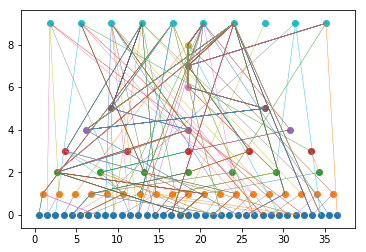

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 2, 6, 6,
       2, 2, 2, 2, 2, 2, 7, 2, 8, 2, 2, 2, 8, 8, 2, 2, 8, 2, 2, 2, 6, 2,
       2, 8, 8, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 8, 8, 2, 8, 2, 6, 2, 2,
       3, 8, 3, 3, 7, 6, 0, 6, 7, 7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 7, 7, 7, 6, 3, 3, 6, 3, 3, 8, 6, 0, 6, 8, 3, 6, 8, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 3, 7, 7, 8, 3, 3, 8, 2,
       2, 3, 8, 3, 2, 2, 8, 8, 7, 0, 3, 7, 7, 3, 3, 8, 0, 0, 0, 3, 3, 3,
       3, 3, 0, 3])

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.4444444444444444

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[16  0  0  0  1  1  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0 11 12  4  0  0  0  0  4  0]
 [ 0  0  0  9  0  5  0  0  5  9]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  5  1  1 14  6 18  0  0  0]
 [ 0  1  0  0  5  3  0 19  2  3]
 [ 0  2  4  4  0  3  0  0  6  1]
 [ 0  0  0  0  0  0  0  0  0  0]]


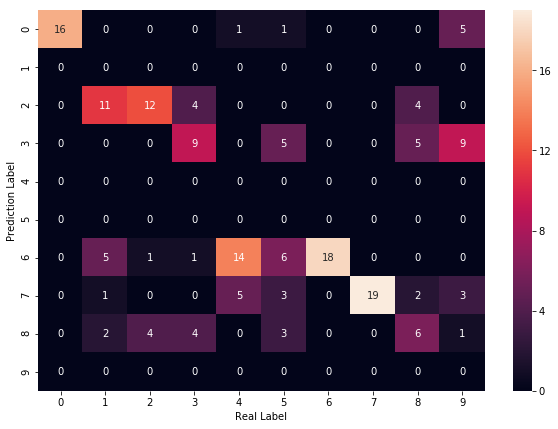

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [19]:
visualize.draw_net(config, winner, prune_unused=False)
visualize.plot_stats(stats, ylog=False, view=False)
visualize.plot_species(stats, view=False)

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [37, 19, 7, 5, 3, 2, 1, 1, 1, 10]


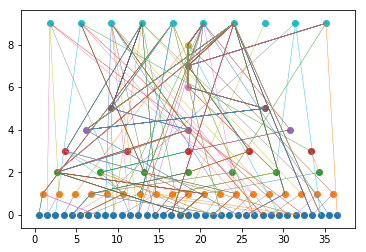

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

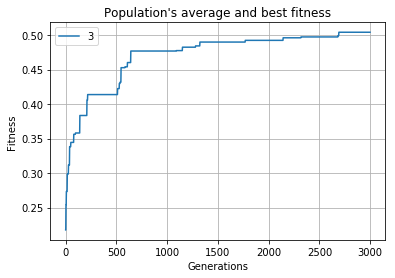

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


length of each layers: [37, 19, 7, 5, 3, 2, 1, 1, 1, 10]
Total nodes:86 Total connections::362
